<a href="https://colab.research.google.com/github/sarahayek98/Detection-of-Alzheimer-using-3-ML/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your folder
folder_name = 'AlzheimerDataset/train'
folder_path = f'/content/drive/MyDrive/{folder_name}'

# List files in the folder
files = os.listdir(folder_path)
print(files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['MildDemented', 'ModerateDemented', 'VeryMildDemented', 'NonDemented']


In [ ]:
pip install opencv-python

In [ ]:
# Import necessary libraries
import numpy as np
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix , classification_report

In [ ]:
train_folder = '/content/drive/MyDrive/AlzheimerDataset/train'
test_folder = '/content/drive/MyDrive/AlzheimerDataset/test'

In [ ]:
pip install SimpleITK


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.7 MB/s eta 0:00:00


In [ ]:
# Step 1: Extract features from MRI images and store them in a DataFrame
def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Flatten the 2D array to a 1D array as features
    return image.flatten()

def create_dataset(folder_path):
    data = []
    labels = []
    classes = os.listdir(folder_path)

    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            features = extract_features(image_path)
            data.append(features)
            labels.append(class_name)

    return pd.DataFrame({'features': data, 'label': labels})

train_folder = '/content/drive/MyDrive/AlzheimerDataset/train'
test_folder = '/content/drive/MyDrive/AlzheimerDataset/test'

train_df = create_dataset(train_folder)
test_df = create_dataset(test_folder)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AlzheimerDataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5121 images belonging to 4 classes.


In [ ]:

# Step 2: Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_df['features'].to_list(), train_df['label'], test_size=0.2, random_state=42)

In [ ]:

# Step 3: Create an instance of the Random Forest classifier and fit it to the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 4: Make predictions on the test set and evaluate the performance
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9073170731707317
Classification Report:
                   precision    recall  f1-score   support

    MildDemented       1.00      0.79      0.88       159
ModerateDemented       1.00      0.25      0.40        16
     NonDemented       0.89      0.99      0.94       490
VeryMildDemented       0.89      0.88      0.88       360

        accuracy                           0.91      1025
       macro avg       0.95      0.73      0.78      1025
    weighted avg       0.91      0.91      0.90      1025



In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a new Random Forest classifier with scaled features
scaled_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
scaled_rf_classifier.fit(X_train_scaled, y_train)

# Evaluate the model with scaled features
scaled_y_pred = scaled_rf_classifier.predict(X_test_scaled)
scaled_accuracy = accuracy_score(y_test, scaled_y_pred)
scaled_classification_rep = classification_report(y_test, scaled_y_pred)

print(f"Scaled Model Accuracy: {scaled_accuracy}")
print("Scaled Model Classification Report:\n", scaled_classification_rep)

Scaled Model Accuracy: 0.9073170731707317
Scaled Model Classification Report:
                   precision    recall  f1-score   support

    MildDemented       1.00      0.79      0.88       159
ModerateDemented       1.00      0.25      0.40        16
     NonDemented       0.89      0.99      0.94       490
VeryMildDemented       0.89      0.88      0.88       360

        accuracy                           0.91      1025
       macro avg       0.95      0.73      0.78      1025
    weighted avg       0.91      0.91      0.90      1025



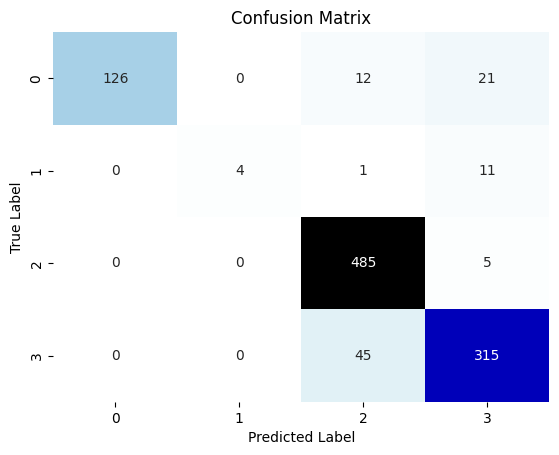

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for the original model
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a custom colormap
custom_cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', ['white', 'lightblue', 'blue', 'darkblue', 'black'])

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Load the saved model for future predictions
loaded_model = joblib.load('random_forest_model.pkl')

# Example: Make predictions with the loaded model
new_data = extract_features('/content/drive/MyDrive/example data/moderateDem0.jpg')
new_prediction = loaded_model.predict([new_data])
print("Prediction for new data:", new_prediction)

Prediction for new data: ['ModerateDemented']


In [ ]:
import joblib
import cv2
import numpy as np

# Load the pre-trained model
/loaded_model = joblib.load('random_forest_model.pkl')

# Define the feature extraction process
def extract_features(image_path):
    # Your feature extraction logic here
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image.flatten()

# Load a new image for prediction
new_image_path = '/content/drive/MyDrive/example data/MRI.jpg'
new_data = extract_features(new_image_path)

# Ensure consistent input shape (flatten if needed)
new_data_flattened = np.array(new_data).flatten()

# Reshape to match the expected number of features
expected_features = 36608  # Adjust this based on your model's expected features
new_data_flattened = new_data_flattened[:expected_features].reshape(1, -1)

# Handle missing or unexpected data
if new_data is not None:
    # Make predictions with the loaded model
    new_prediction = loaded_model.predict(new_data_flattened)
    print("Prediction for the new image:", new_prediction)
else:
    print("Missing data, unable to make predictions.")

Prediction for the new image: ['VeryMildDemented']


In [ ]:
import joblib
import json
import base64

# Load the trained model
rf_model = joblib.load('random_forest_model.pkl')

# Save the model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

# Convert the model to base64 format
with open('random_forest_model.joblib', 'rb') as model_file:
    model_base64 = base64.b64encode(model_file.read()).decode('utf-8')

# Save the model as JSON
with open('random_forest_model.json', 'w') as json_file:
    json.dump({'model': model_base64}, json_file)

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
from google.colab import files

# Download the model file
files.download('random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>